# Praktikum 3


In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import Lab3Functions as l3f
from scipy.integrate import cumulative_trapezoid



## 2. Vorbereitung der Daten

In [2]:
from Lab3Functions import import_data
weights, mvc, fatigue = import_data('\t')

In [3]:
# Hoch- und Tiefpassfilter definieren
def butterworth_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low')
    return signal.filtfilt(b, a, data)

# def lowpass_filter(data, cutoff, fs, order=4):
#     from scipy.signal import butter, filtfilt
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     filtered_data = filtfilt(b, a, data)
#     return filtered_data

# Hauptverarbeitungsschritte
def process_emg_data(data, fs=1000):
    # Offset entfernen
    data['emg'] = data['emg'] - np.mean(data['emg'])

    # Bandpassfiltern (20-450 Hz)
    data['filtered_emg'] = butterworth_filter(data['emg'], 20, 450, fs)

    # Signal gleichrichten (Absolutwert bilden)
    data['rectified_emg'] = np.abs(data['filtered_emg'])

    # Tiefpassfilter auf den Absolutwert anwenden (3 Hz)
    data['envelope'] = lowpass_filter(data['rectified_emg'], 3, fs)

    return data

### MVC von Carina

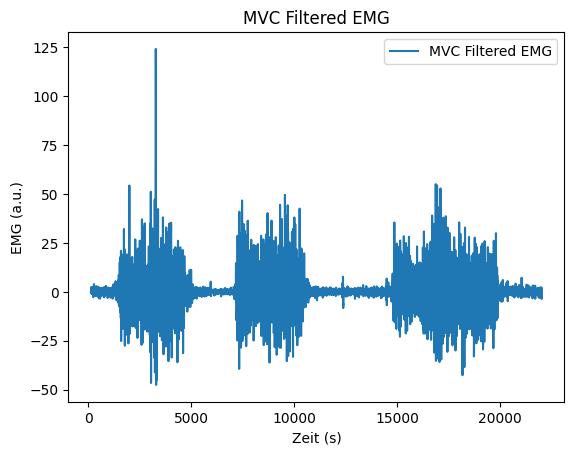

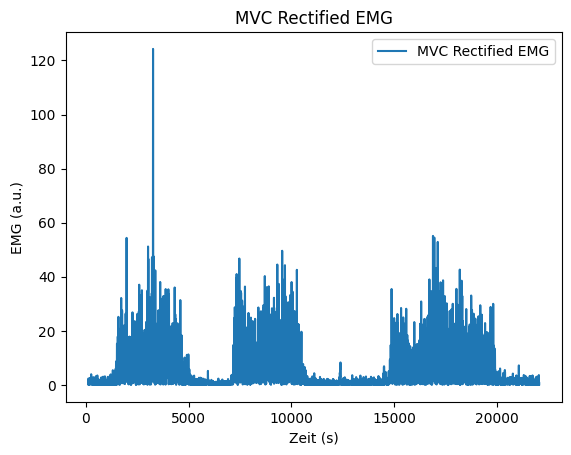

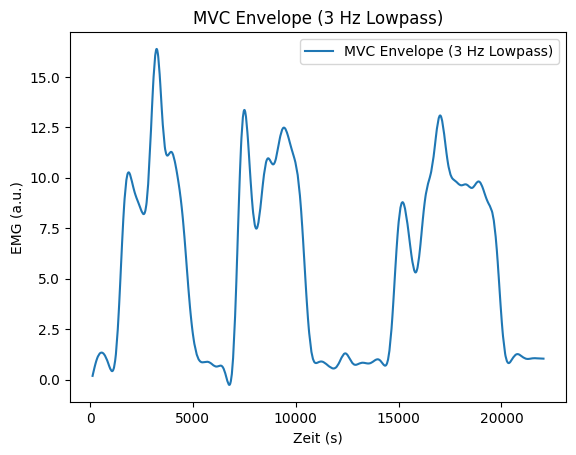

Der gemittelte MVC-Wert beträgt: 5.763654092341153


In [4]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvc['emg'])
mvc['mean_corrected'] = mvc['emg'] - mvc_mean_offset

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['emg'], label='MVC Mean Offset')
# plt.title('MVC Mean Offset')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

# plt.subplot(2, 2, 2)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Mean Corrected')
# plt.title('MVC Mean Corrected Values')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

# plt.tight_layout()
# plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvc['mean_corrected'], 20, 450, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Unfiltered EMG')
# plt.title('MVC Unfiltered EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Filtered EMG')
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Unrectified EMG')
# plt.title('MVC Unrectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.show()

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
# plt.title('MVC Rectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()


plt.plot(mvc['t'], mvc_envelope, label='MVC Envelope (3 Hz Lowpass)')
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.show()

mvc_mean = np.mean(mvc_envelope)
print(f"Der gemittelte MVC-Wert beträgt: {mvc_mean}")


### MVC von Andreas

In [5]:
from importmvcpaulineandreas import import_dataAndreas
mvca  = import_dataAndreas('\t')

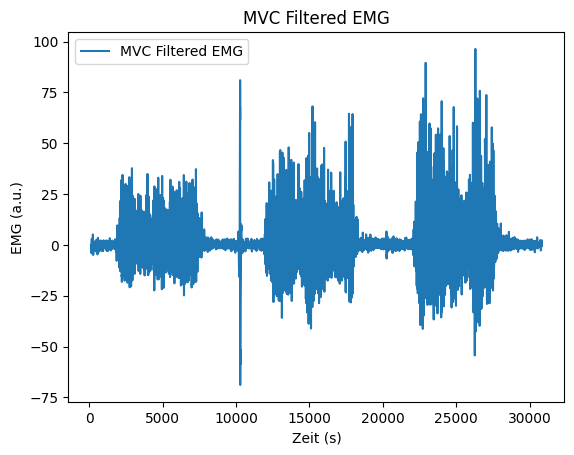

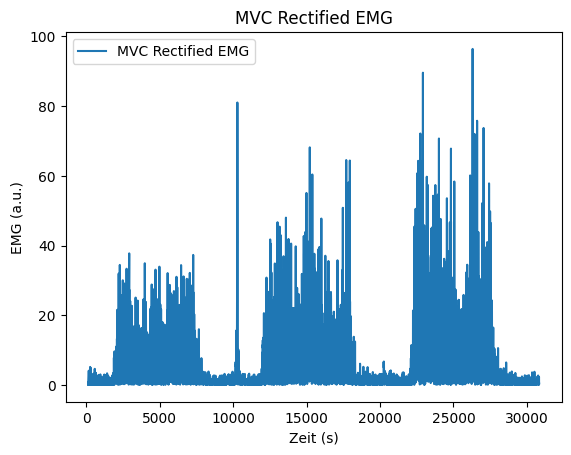

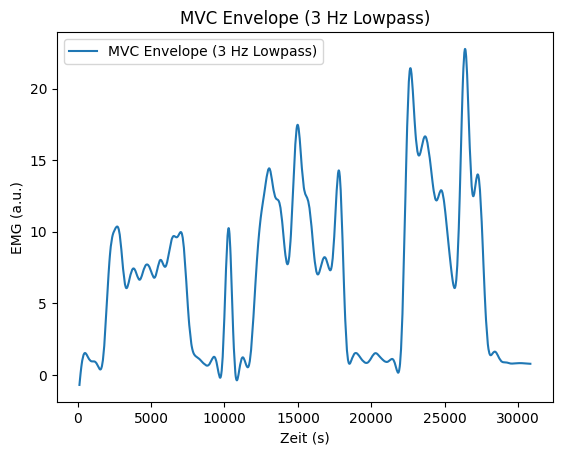

Der gemittelte MVC-Wert beträgt: 6.794255456962212


In [6]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvca['emg'])
mvca['mean_corrected'] = mvca['emg'] - mvc_mean_offset

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['emg'], label='MVC Mean Offset')
# plt.title('MVC Mean Offset')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

# plt.subplot(2, 2, 2)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Mean Corrected')
# plt.title('MVC Mean Corrected Values')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

# plt.tight_layout()
# plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvca['mean_corrected'], 20, 450, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Unfiltered EMG')
# plt.title('MVC Unfiltered EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvca['t'], mvc_filtered_emg, label='MVC Filtered EMG')
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Unrectified EMG')
# plt.title('MVC Unrectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvca['t'], mvc_rectified_emg, label='MVC Rectified EMG')
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.show()

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
# plt.title('MVC Rectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()


plt.plot(mvca['t'], mvc_envelope, label='MVC Envelope (3 Hz Lowpass)')
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.show()

mvc_mean = np.mean(mvc_envelope)
print(f"Der gemittelte MVC-Wert beträgt: {mvc_mean}")


### MVC von Pauline

In [7]:
from importmvcpaulineandreas import import_dataPauline
mvcp = import_dataPauline('\t')

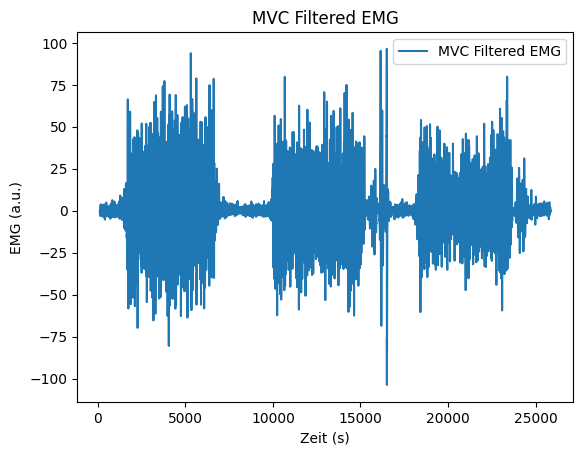

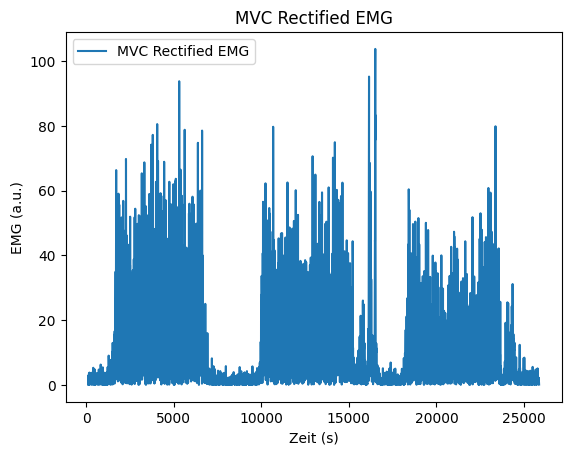

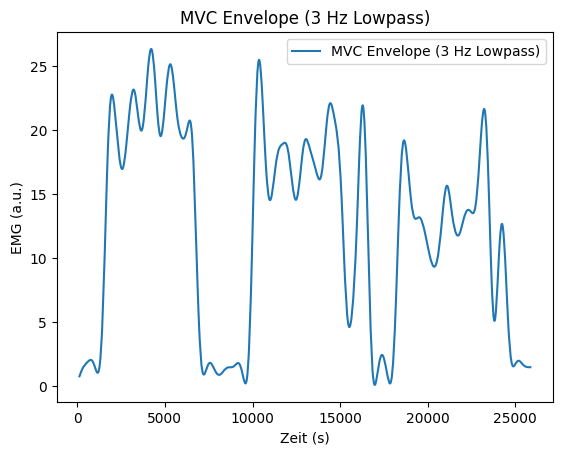

Der gemittelte MVC-Wert beträgt: 12.456446833108862


In [8]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvcp['emg'])
mvcp['mean_corrected'] = mvcp['emg'] - mvc_mean_offset

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['emg'], label='MVC Mean Offset')
# plt.title('MVC Mean Offset')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

# plt.subplot(2, 2, 2)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Mean Corrected')
# plt.title('MVC Mean Corrected Values')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

# plt.tight_layout()
# plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvcp['mean_corrected'], 20, 450, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Unfiltered EMG')
# plt.title('MVC Unfiltered EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvcp['t'], mvc_filtered_emg, label='MVC Filtered EMG')
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Unrectified EMG')
# plt.title('MVC Unrectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvcp['t'], mvc_rectified_emg, label='MVC Rectified EMG')
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.show()

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
# plt.title('MVC Rectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()


plt.plot(mvcp['t'], mvc_envelope, label='MVC Envelope (3 Hz Lowpass)')
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.show()

mvc_mean = np.mean(mvc_envelope)
print(f"Der gemittelte MVC-Wert beträgt: {mvc_mean}")


## Aufgabe 3

### a)

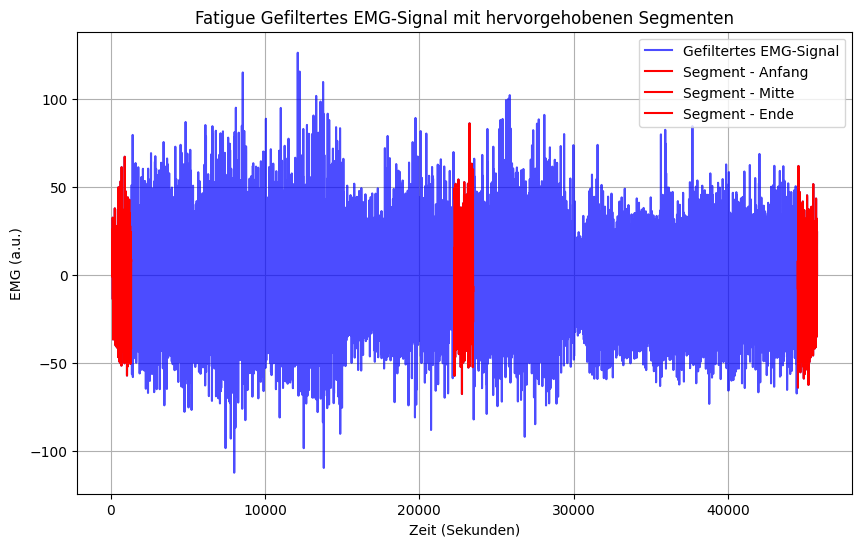

In [9]:
fs = 1000  

# EMG-Daten aus fatigue
emg_signal = fatigue['emg'] - np.mean(fatigue['emg'])  # Signal zentrieren
time = fatigue['t'].values  # Zeitachse

# Filtern der EMG-Daten
filtered_emg = butterworth_filter(emg_signal, lowcut=20, highcut=450, fs=fs)
fatigue['filtered_emg'] = filtered_emg  # Gefilterte Daten zu fatigue hinzufügen

# Segmentierung
segment_duration = 0.5  # Länge des Segments in Sekunden
samples_per_segment = int(segment_duration * fs)

# Indizes für Anfang, Mitte und Ende
start_idx = 0
middle_idx = len(fatigue['filtered_emg']) // 2 - samples_per_segment // 2
end_idx = len(fatigue['filtered_emg']) - samples_per_segment

start_segment = fatigue['filtered_emg'][start_idx:start_idx + samples_per_segment]
middle_segment = fatigue['filtered_emg'][middle_idx:middle_idx + samples_per_segment]
end_segment = fatigue['filtered_emg'][end_idx:end_idx + samples_per_segment]

# Zeitachsen für die Segmente
start_time = fatigue['t'][start_idx:start_idx + samples_per_segment]
middle_time = fatigue['t'][middle_idx:middle_idx + samples_per_segment]
end_time = fatigue['t'][end_idx:end_idx + samples_per_segment]

# Plotten des gesamten Signals mit hervorgehobenen Segmenten
plt.figure(figsize=(10, 6))
plt.plot(fatigue['t'], fatigue['filtered_emg'], label='Gefiltertes EMG-Signal', color='blue', alpha=0.7)

# Markieren der Segmente
plt.plot(start_time, start_segment, color='red', label='Segment - Anfang')
plt.plot(middle_time, middle_segment, color='red', label='Segment - Mitte')
plt.plot(end_time, end_segment, color='red', label='Segment - Ende')

plt.title('Fatigue Gefiltertes EMG-Signal mit hervorgehobenen Segmenten')
plt.xlabel('Zeit (Sekunden)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.grid()
plt.show()


### b)

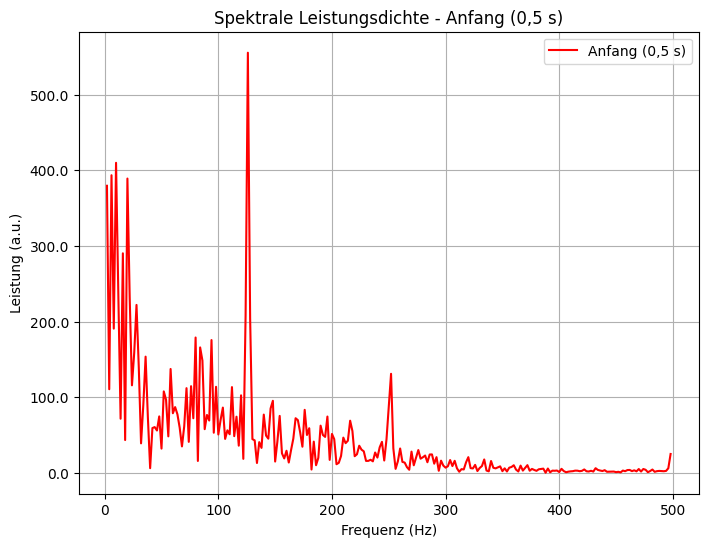

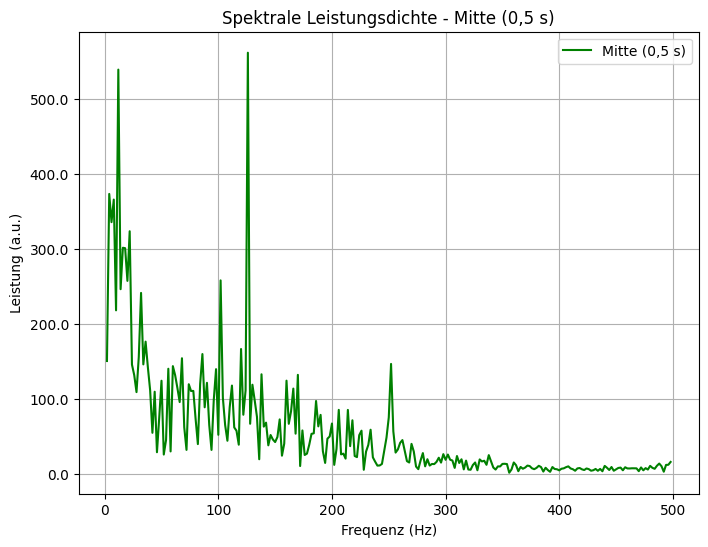

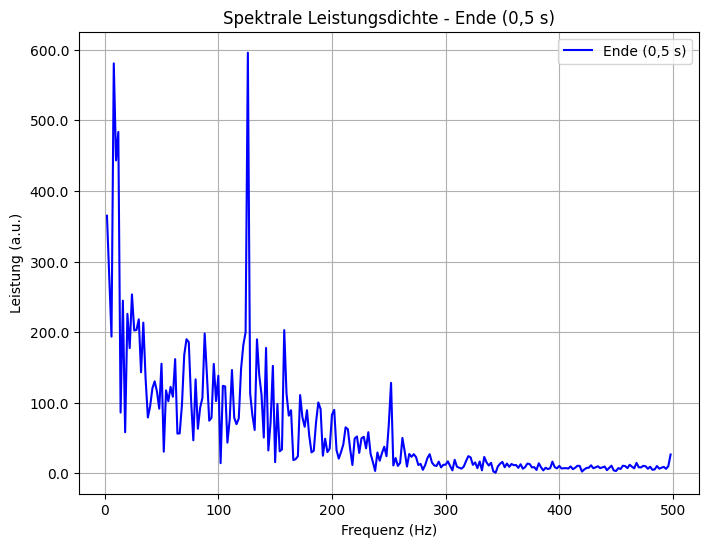

In [10]:


# Filtereinstellungen
fs = 1000  # Samplingfrequenz in Hz
segment_duration = 0.5  # Segmentdauer in Sekunden
samples_per_segment = int(segment_duration * fs)

# Indizes für Burst-Segmente aus fatigue['emg']
burst_start_idx = int(4 * fs)  # Startindex
burst_end_idx = burst_start_idx + int(1.5 * fs)  # Endindex

# Segmente für Anfang, Mitte und Ende des Bursts
start_idx = burst_start_idx
start_segment = fatigue['emg'][start_idx:start_idx + samples_per_segment]

middle_idx = burst_start_idx + (burst_end_idx - burst_start_idx) // 2 - samples_per_segment // 2
middle_segment = fatigue['emg'][middle_idx:middle_idx + samples_per_segment]

end_idx = burst_end_idx - samples_per_segment
end_segment = fatigue['emg'][end_idx:end_idx + samples_per_segment]

# Berechnung der spektralen Leistungsdichte für jedes Segment
start_power, start_freqs = l3f.get_power(start_segment, fs)
middle_power, middle_freqs = l3f.get_power(middle_segment, fs)
end_power, end_freqs = l3f.get_power(end_segment, fs)

# Plot für das Segment "Anfang"
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.plot(start_freqs, start_power, color='red', label='Anfang (0,5 s)')
plt.title('Spektrale Leistungsdichte - Anfang (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Mitte"
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.plot(middle_freqs, middle_power, color='green', label='Mitte (0,5 s)')
plt.title('Spektrale Leistungsdichte - Mitte (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Ende"
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.plot(end_freqs, end_power, color='blue', label='Ende (0,5 s)')
plt.title('Spektrale Leistungsdichte - Ende (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()


### c)

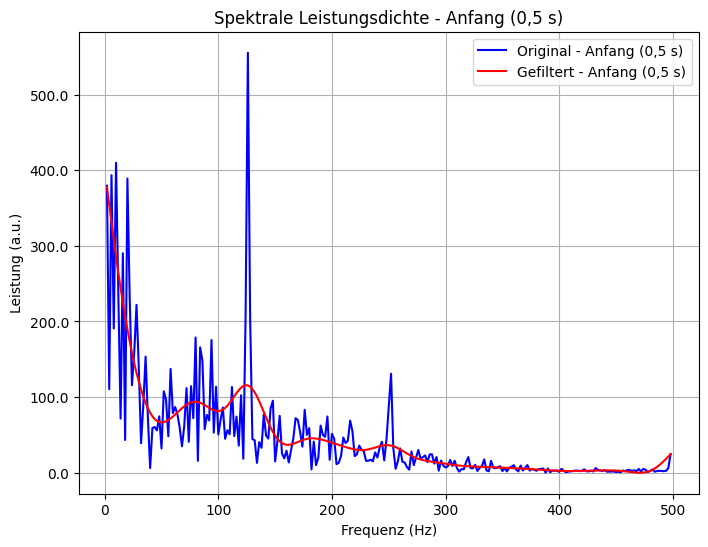

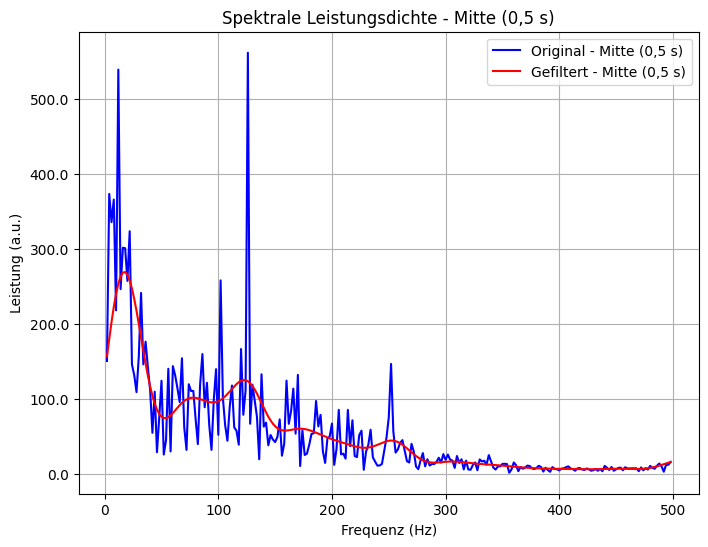

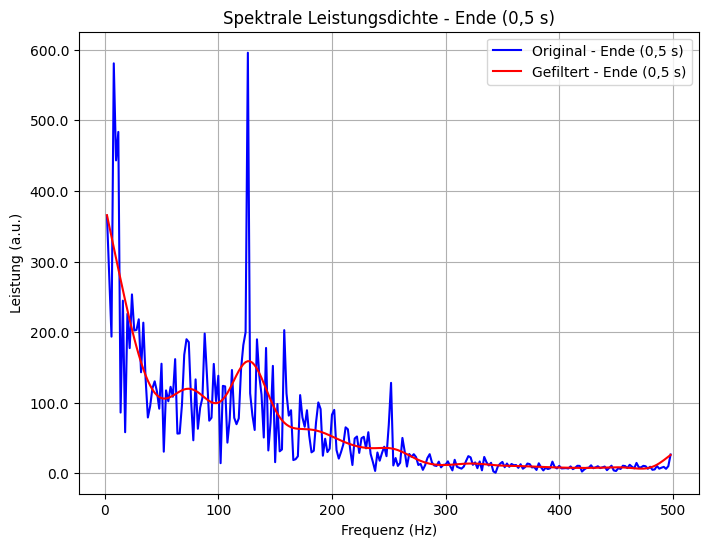

In [11]:
# Filtereinstellungen
cutoff_freq = 40  # Cutoff-Frequenz für den Lowpass-Filter

filtered_start_power = lowpass_filter(start_power, cutoff=cutoff_freq, fs=fs)
filtered_middle_power = lowpass_filter(middle_power, cutoff=cutoff_freq, fs=fs)
filtered_end_power = lowpass_filter(end_power, cutoff=cutoff_freq, fs=fs)

# 7. Plotten der gefilterten spektralen Leistungsdichte für die drei Segmente

# Plot für das Segment "Anfang"
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.plot(start_freqs, start_power, color='blue', label='Original - Anfang (0,5 s)')
plt.plot(start_freqs, filtered_start_power, color='red', label='Gefiltert - Anfang (0,5 s)')
plt.title('Spektrale Leistungsdichte - Anfang (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Mitte"
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.plot(middle_freqs, middle_power, color='blue', label='Original - Mitte (0,5 s)')
plt.plot(middle_freqs, filtered_middle_power, color='red', label='Gefiltert - Mitte (0,5 s)')
plt.title('Spektrale Leistungsdichte - Mitte (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Ende"
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.plot(end_freqs, end_power, color='blue', label='Original - Ende (0,5 s)')
plt.plot(end_freqs, filtered_end_power, color='red', label='Gefiltert - Ende (0,5 s)')
plt.title('Spektrale Leistungsdichte - Ende (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()


## 4. (Aufgabe 10)

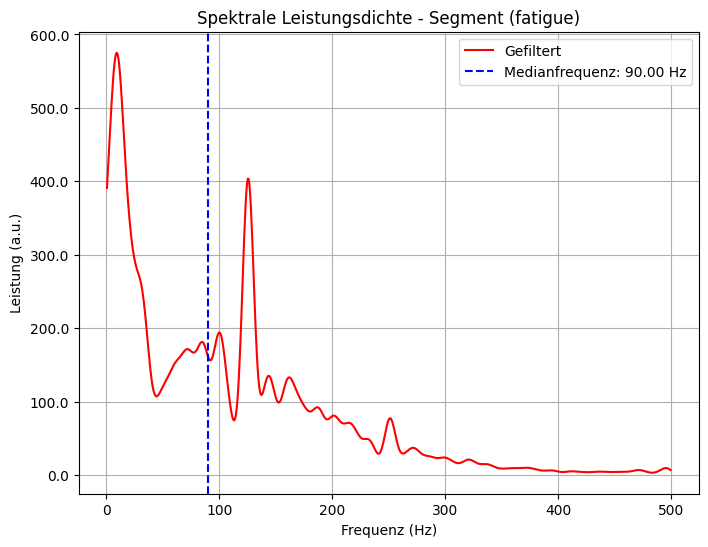

Gesamte Leistung: 441854.56
Medianfrequenz: 90.00 Hz


In [12]:
# Filtereinstellungen
cutoff_freq = 40  # Cutoff-Frequenz
fs = 1000          # Samplingfrequenz

# Segment aus fatigue-Daten definieren
start_idx = int(4 * fs)  # Startindex
end_idx = start_idx + int(1.5 * fs)  # Endindex
segment = fatigue['emg'][start_idx:end_idx]  # Das Segment aus fatigue['emg']

# Spektrale Leistungsdichte berechnen
power, freqs = l3f.get_power(segment, fs)

# Gefilterte Leistungsdichte berechnen
filtered_power = lowpass_filter(power, cutoff=cutoff_freq, fs=fs)

# Berechnung der Fläche unter der Kurve und Medianfrequenz
area = cumulative_trapezoid(filtered_power, freqs, initial=0)  # Fläche unter der Kurve
total_power = area[-1]  # Gesamte Leistung
median_freq = freqs[np.where(area >= total_power / 2)[0][0]]  # Medianfrequenz

# Plot der gefilterten spektralen Leistungsdichte mit Medianfrequenz
plt.figure(figsize=(8, 6))
plt.plot(freqs, filtered_power, color='red', label='Gefiltert')
plt.axvline(median_freq, color='blue', linestyle='--', label=f'Medianfrequenz: {median_freq:.2f} Hz')
plt.title('Spektrale Leistungsdichte - Segment (fatigue)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Ausgabe der berechneten Werte
print(f"Gesamte Leistung: {total_power:.2f}")
print(f"Medianfrequenz: {median_freq:.2f} Hz")



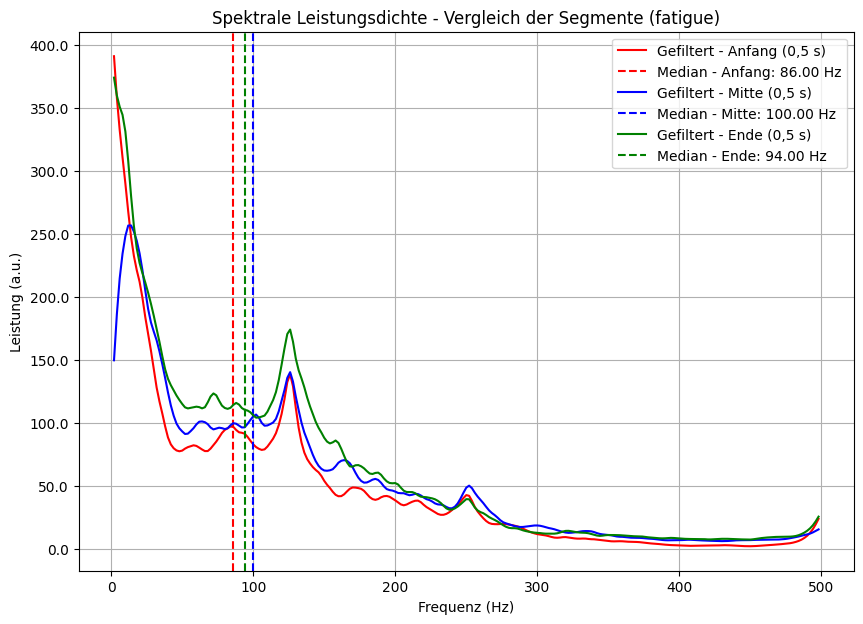

In [13]:
# Filtereinstellungen
cutoff_freq = 40  # Cutoff-Frequenz für den Lowpass-Filter
filter_order = 1   # Reduzierte Filterordnung
fs = 1000          # Samplingfrequenz in Hz
samples_per_segment = 500  # Anzahl der Samples pro Segment

# Start-, Mitte- und Endsegmente aus fatigue['emg'] definieren
burst_start_idx = int(4 * fs)  # Startindex
burst_end_idx = burst_start_idx + int(1.5 * fs)  # Endindex

start_idx = burst_start_idx
start_segment = fatigue['emg'][start_idx:start_idx + samples_per_segment]

middle_idx = burst_start_idx + (burst_end_idx - burst_start_idx) // 2 - samples_per_segment // 2
middle_segment = fatigue['emg'][middle_idx:middle_idx + samples_per_segment]

end_idx = burst_end_idx - samples_per_segment
end_segment = fatigue['emg'][end_idx:end_idx + samples_per_segment]

# Spektrale Leistungsdichte für die Segmente berechnen
start_power, start_freqs = l3f.get_power(start_segment, fs)
middle_power, middle_freqs = l3f.get_power(middle_segment, fs)
end_power, end_freqs = l3f.get_power(end_segment, fs)

# Gefilterte spektrale Leistungsdichte mit neuen Filtereinstellungen
filtered_start_power = lowpass_filter(start_power, cutoff=cutoff_freq, fs=fs, order=filter_order)
filtered_middle_power = lowpass_filter(middle_power, cutoff=cutoff_freq, fs=fs, order=filter_order)
filtered_end_power = lowpass_filter(end_power, cutoff=cutoff_freq, fs=fs, order=filter_order)

# Berechnung der Medianfrequenzen für die Segmente
def calculate_median_frequency(power, freqs):
    area = cumulative_trapezoid(power, freqs, initial=0)
    total_power = area[-1]
    median_freq = freqs[np.where(area >= total_power / 2)[0][0]]
    return median_freq

median_freq_start = calculate_median_frequency(filtered_start_power, start_freqs)
median_freq_middle = calculate_median_frequency(filtered_middle_power, middle_freqs)
median_freq_end = calculate_median_frequency(filtered_end_power, end_freqs)

# Gemeinsamer Plot für die Segmente
plt.figure(figsize=(10, 7))
plt.plot(start_freqs, filtered_start_power, color='red', label='Gefiltert - Anfang (0,5 s)')
plt.axvline(median_freq_start, color='red', linestyle='--', label=f'Median - Anfang: {median_freq_start:.2f} Hz')
plt.plot(middle_freqs, filtered_middle_power, color='blue', label='Gefiltert - Mitte (0,5 s)')
plt.axvline(median_freq_middle, color='blue', linestyle='--', label=f'Median - Mitte: {median_freq_middle:.2f} Hz')
plt.plot(end_freqs, filtered_end_power, color='green', label='Gefiltert - Ende (0,5 s)')
plt.axvline(median_freq_end, color='green', linestyle='--', label=f'Median - Ende: {median_freq_end:.2f} Hz')
plt.title('Spektrale Leistungsdichte - Vergleich der Segmente (fatigue)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)/10}'))  # Entferne die letzte 0 optisch
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()



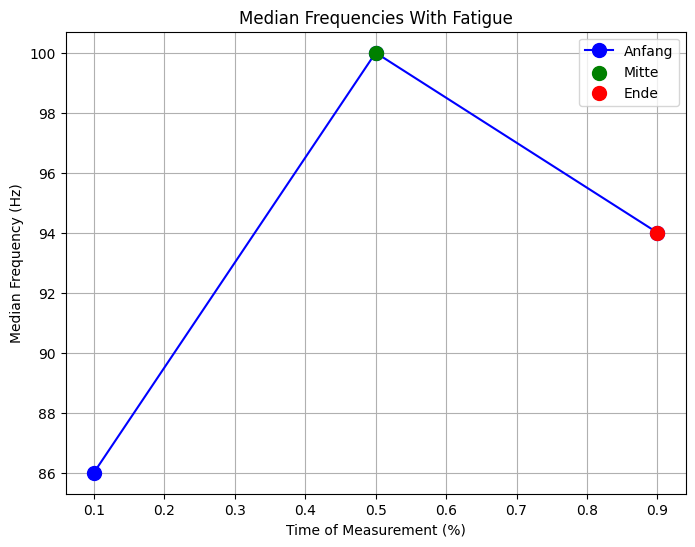

In [14]:
median_frequencies = [median_freq_start, median_freq_middle, median_freq_end]
time_points = [0.1, 0.5, 0.9]

plt.figure(figsize=(8, 6))
plt.plot(time_points, median_frequencies, marker='o', color='blue', label='Anfang', markersize=10)
plt.scatter([0.5], [median_freq_middle], color='green', label='Mitte', s=100, zorder=3)
plt.scatter([0.9], [median_freq_end], color='red', label='Ende', s=100, zorder=3)
plt.title('Median Frequencies With Fatigue')
plt.xlabel('Time of Measurement (%)')
plt.ylabel('Median Frequency (Hz)')
plt.grid()
plt.legend()
plt.show()


## Teil 3

### Abgabe 5

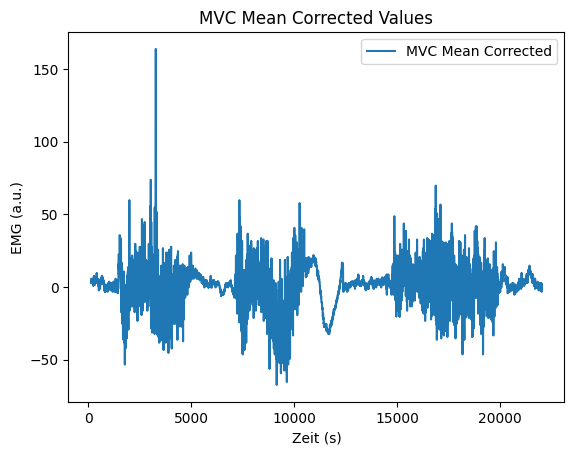

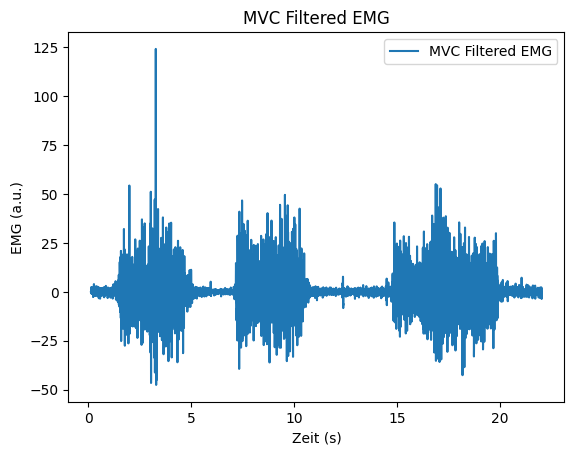

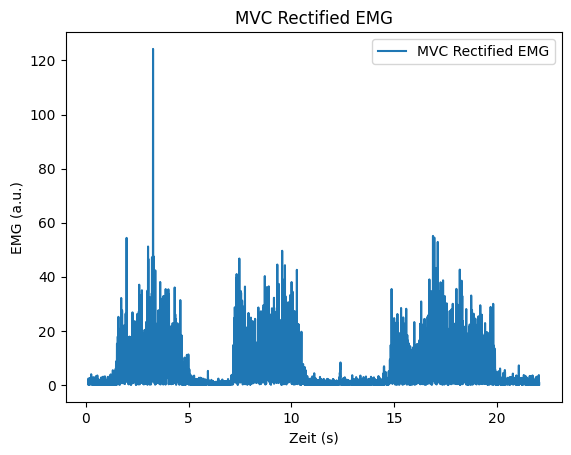

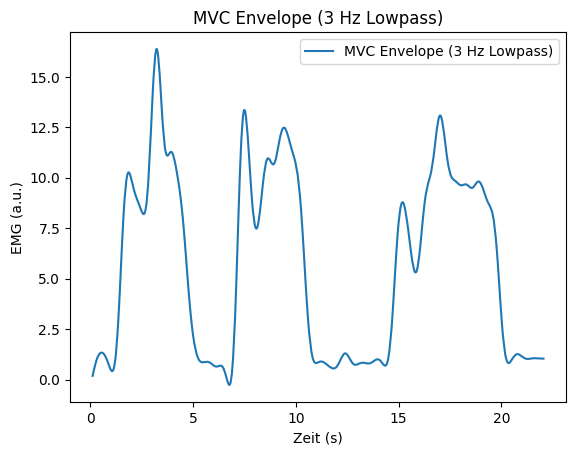

Der gemittelte MVC-Wert beträgt: 5.763654092341153


In [28]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvc['emg'])
mvc['mean_corrected'] = mvc['emg'] - mvc_mean_offset

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['emg'], label='MVC Mean Offset')
# plt.title('MVC Mean Offset')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()

plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Mean Corrected')
plt.title('MVC Mean Corrected Values')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

# plt.tight_layout()
# plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvc['mean_corrected'], 20, 450, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Unfiltered EMG')
# plt.title('MVC Unfiltered EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvc['t']/1000, mvc_filtered_emg, label='MVC Filtered EMG')
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Unrectified EMG')
# plt.title('MVC Unrectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()



plt.plot(mvc['t']/1000, mvc_rectified_emg, label='MVC Rectified EMG')
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.show()

# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
# plt.title('MVC Rectified EMG')
# plt.xlabel('Zeit (s)')
# plt.ylabel('EMG (a.u.)')
# plt.legend()


plt.plot(mvc['t']/1000, mvc_envelope, label='MVC Envelope (3 Hz Lowpass)')
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.show()

mvc_mean = np.mean(mvc_envelope)
print(f"Der gemittelte MVC-Wert beträgt: {mvc_mean}")


### Aufgabe 8)

In [16]:
import pandas as pd

def import_weight_files(separator="\t"):
    """
    Importiert die drei Fatigue-Datensätze und gibt jeden als separaten DataFrame zurück.
    Input: separator - Trennzeichen für die Dateien (standardmäßig Tabulator)
    Output: Drei DataFrames, jeweils für Fatigue1, Fatigue2 und Fatigue3.
    """
    def time_norm(data):
        # Normalisiert die Zeitachse, um kontinuierliche Werte sicherzustellen
        times = list(data['t'])
        offset = 0
        for i in range(1, len(times)):
            if times[i] < times[i - 1]:
                offset += times[i - 1] - times[i] + 1
            times[i] += offset
        data['t'] = times
        return data

    # Leerer Platzhalter für die DataFrames
    weight_files = []

    # Lade die drei Fatigue-Datensätze
    for i in range(1, 4):
        file_name = f"Weight{i}.txt"
        temp_data = pd.read_csv(file_name, sep=separator, names=['emg', 't'], skiprows=0, engine='python')
        weight_files.append(time_norm(temp_data))

    return weight_files[0], weight_files[1], weight_files[2]


In [17]:
weight1, weight2, weight = import_weight_files()

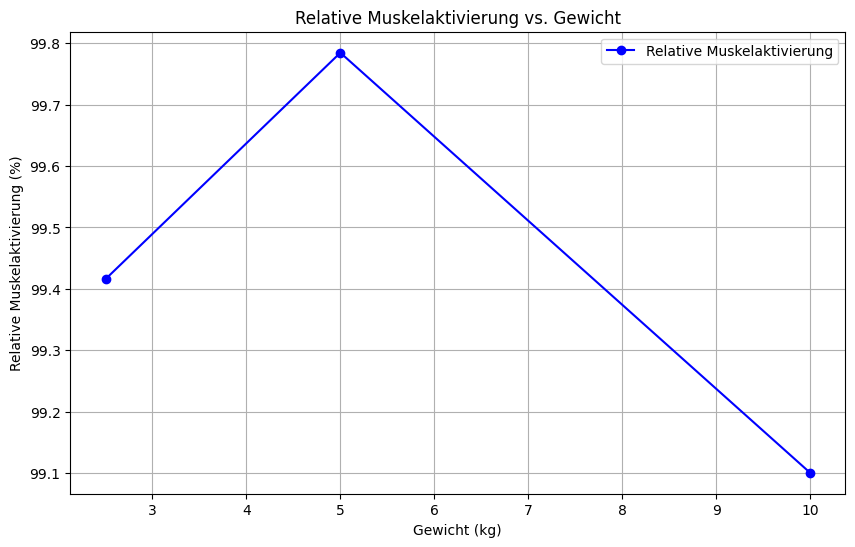

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def import_data(separator="\t"):
    """
    Importiert Daten für Weights, MVC und Fatigue und stellt sicher, dass die Zeit kontinuierlich ist.
    """
    def time_norm(data):
        a = list(data.iloc[:]['t'])
        b = list(data.iloc[:]['t'])

        for u in range(len(a) - 1):
            if a[u] > a[u + 1]:
                offset = a[u] - a[u + 1] + 1
                a[u + 1] = offset + a[u + 1]
                u += 1

        output = pd.DataFrame({'emg': data.emg, 't': a})
        output.reset_index(inplace=True, drop=True)
        return output

    column_names = ['emg', 't']
    weights_data = []
    mvc_data = []

    for i in range(3):
        weights_string = f'Weight{i + 1}.txt'
        mvc_string = f'MVC{i + 1}.txt'

        weights = pd.read_csv(
            weights_string,
            sep=separator, names=column_names, skiprows=50,
            skipfooter=50, engine='python'
        )
        mvc = pd.read_csv(
            mvc_string,
            sep=separator, names=column_names, skiprows=50,
            skipfooter=50, engine='python'
        )

        weights_data.append(time_norm(weights))
        mvc_data.append(time_norm(mvc))

    return weights_data, mvc_data



def calculate_relative_activation(weight_data, mvc_avg):
    """
    Berechnet die relative Muskelaktivierung als Prozentsatz der MVC-Messung.
    """
    weight_data['Relative Activation (%)'] = (weight_data['emg'] / mvc_avg) * 100
    return weight_data

# Datenimport
weights_data, mvc_data = import_data()

# Berechnung der relativen Muskelaktivierung für jedes Paar von Weight und MVC
relative_activations = []
weights_values = [2.5, 5, 10]  # kg

for i in range(3):
    mvc_avg = mvc_data[i]['emg'].mean()
    weight_processed = calculate_relative_activation(weights_data[i], mvc_avg)
    relative_activation_avg = weight_processed['Relative Activation (%)'].mean()
    relative_activations.append(relative_activation_avg)

# Plotten der relativen Muskelaktivierung gegen die Gewichtswerte
plt.figure(figsize=(10, 6))
plt.plot(weights_values, relative_activations, marker='o', color='blue', label='Relative Muskelaktivierung')
plt.title('Relative Muskelaktivierung vs. Gewicht')
plt.xlabel('Gewicht (kg)')
plt.ylabel('Relative Muskelaktivierung (%)')
plt.grid(True)
plt.legend()
plt.show()



### Aufgabe 9.)

In [19]:
import pandas as pd

def import_fatigue_files(separator="\t"):
    """
    Importiert die drei Fatigue-Datensätze und gibt jeden als separaten DataFrame zurück.
    Input: separator - Trennzeichen für die Dateien (standardmäßig Tabulator)
    Output: Drei DataFrames, jeweils für Fatigue1, Fatigue2 und Fatigue3.
    """
    def time_norm(data):
        # Normalisiert die Zeitachse, um kontinuierliche Werte sicherzustellen
        times = list(data['t'])
        offset = 0
        for i in range(1, len(times)):
            if times[i] < times[i - 1]:
                offset += times[i - 1] - times[i] + 1
            times[i] += offset
        data['t'] = times
        return data

    # Leerer Platzhalter für die DataFrames
    fatigue_files = []

    # Lade die drei Fatigue-Datensätze
    for i in range(1, 4):
        file_name = f"Fatigue{i}.txt"
        temp_data = pd.read_csv(file_name, sep=separator, names=['emg', 't'], skiprows=0, engine='python')
        fatigue_files.append(time_norm(temp_data))

    return fatigue_files[0], fatigue_files[1], fatigue_files[2]


In [20]:
fatigue1, fatigue2, fatigue3 = import_fatigue_files()

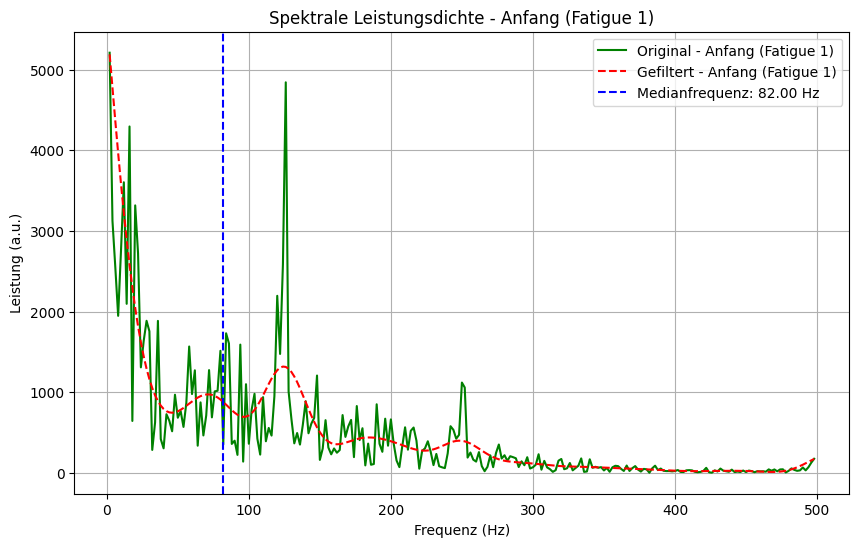

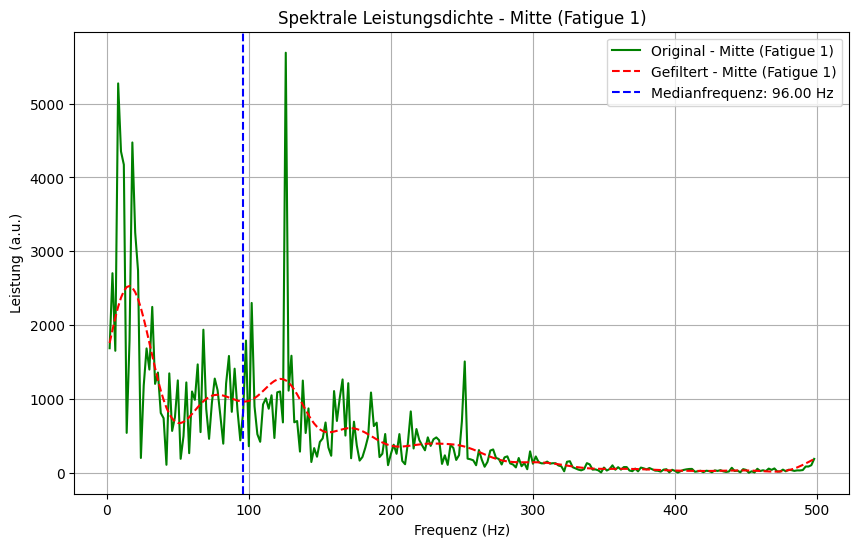

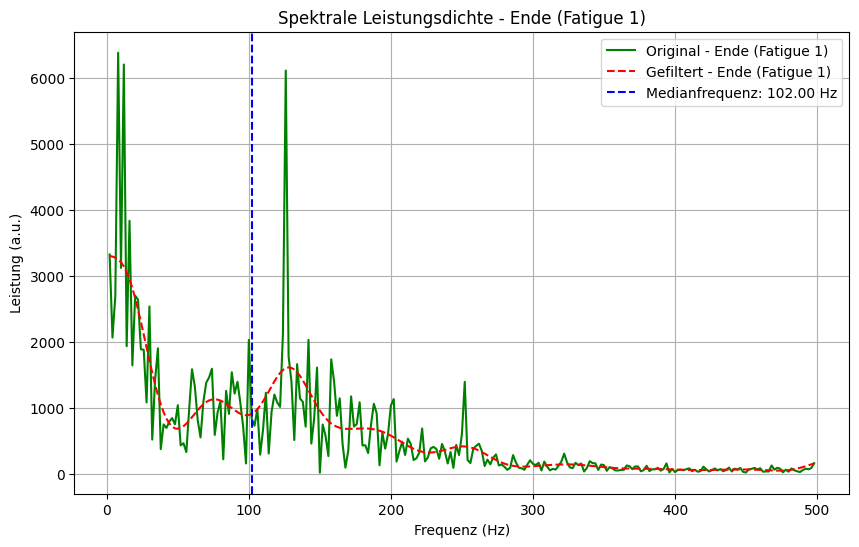

Medianfrequenz (Anfang - Fatigue 1): 82.00 Hz
Medianfrequenz (Mitte - Fatigue 1): 96.00 Hz
Medianfrequenz (Ende - Fatigue 1): 102.00 Hz


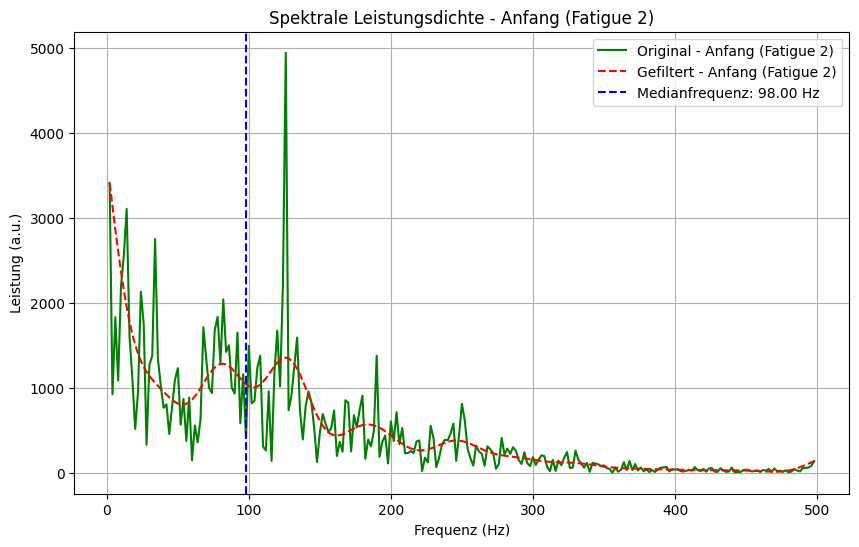

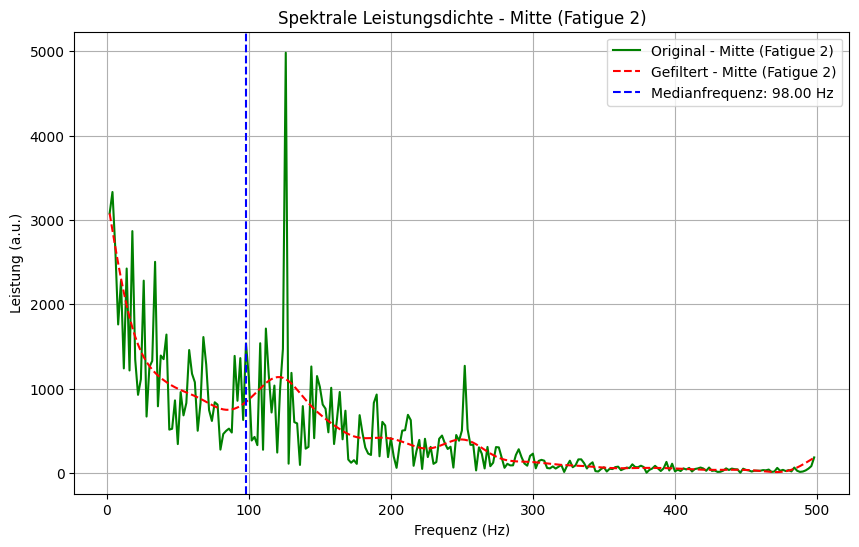

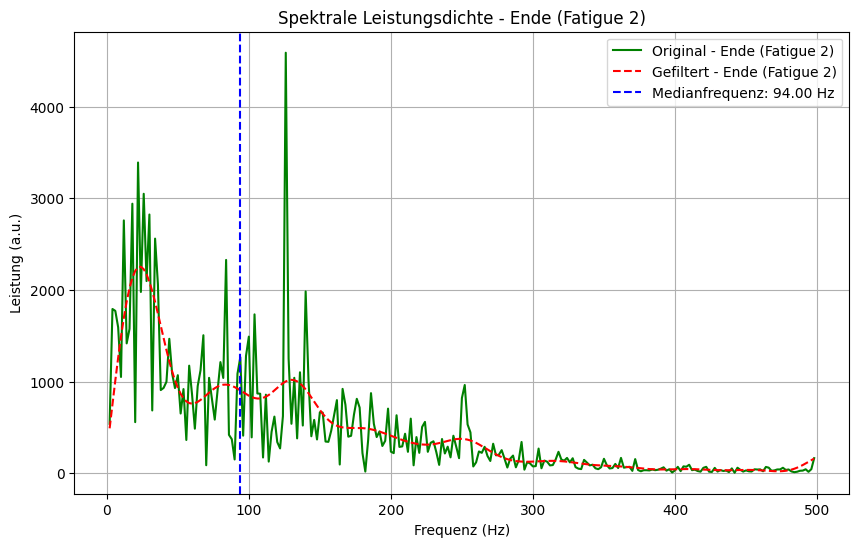

Medianfrequenz (Anfang - Fatigue 2): 98.00 Hz
Medianfrequenz (Mitte - Fatigue 2): 98.00 Hz
Medianfrequenz (Ende - Fatigue 2): 94.00 Hz


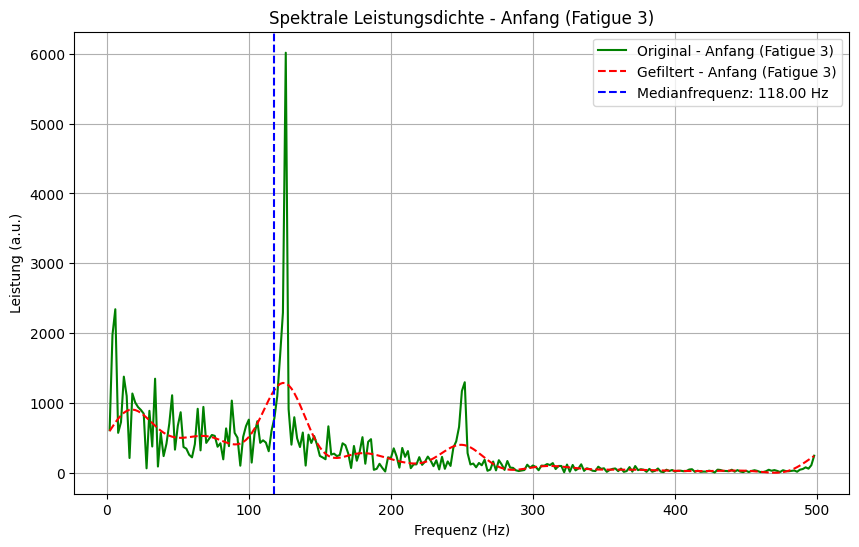

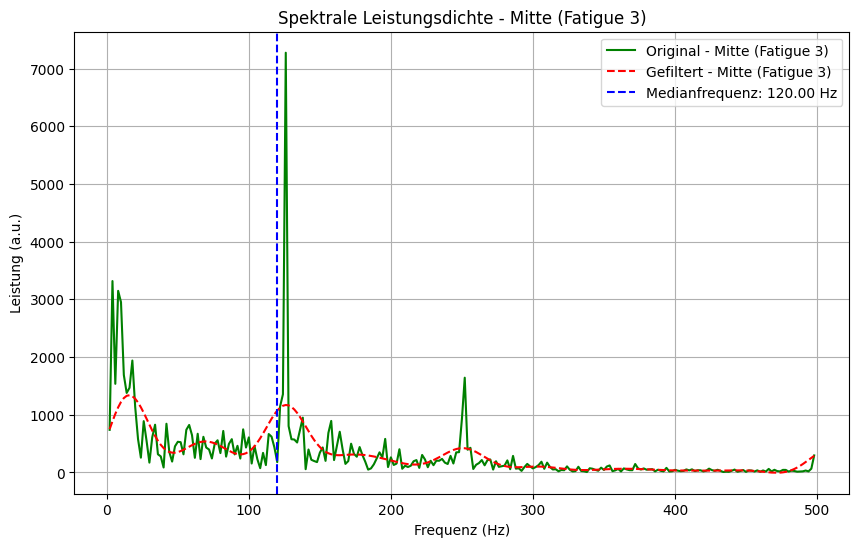

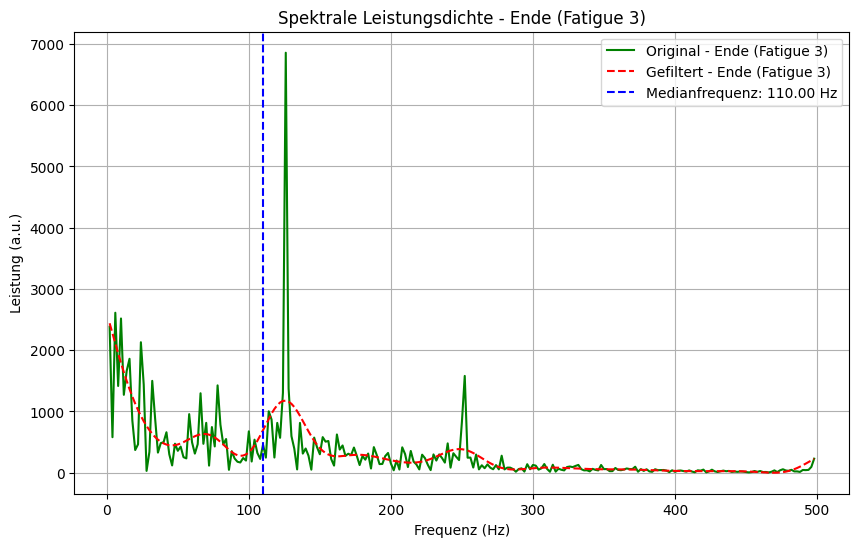

Medianfrequenz (Anfang - Fatigue 3): 118.00 Hz
Medianfrequenz (Mitte - Fatigue 3): 120.00 Hz
Medianfrequenz (Ende - Fatigue 3): 110.00 Hz


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Angenommene Variablen und Funktionen
# fs = Samplingfrequenz, fatigue1, fatigue2 = DataFrames mit 'emg'-Spalte
# l3f.get_power() = Funktion zur Berechnung der spektralen Leistungsdichte
# lowpass_filter() = Funktion zum Filtern der Daten

# Filtereinstellungen
fs = 1000  # Samplingfrequenz in Hz
segment_duration = 0.5  # Segmentdauer in Sekunden
samples_per_segment = int(segment_duration * fs)

# Funktion zur Berechnung und Plot-Erstellung für ein Fatigue-Dataset
def analyze_fatigue(fatigue, label):
    # Indizes für Burst-Segmente aus fatigue['emg']
    burst_start_idx = int(4 * fs)  # Startindex
    burst_end_idx = burst_start_idx + int(1.5 * fs)  # Endindex

    # Segmente für Anfang, Mitte und Ende des Bursts
    start_idx = burst_start_idx
    start_segment = fatigue['emg'][start_idx:start_idx + samples_per_segment]

    middle_idx = burst_start_idx + (burst_end_idx - burst_start_idx) // 2 - samples_per_segment // 2
    middle_segment = fatigue['emg'][middle_idx:middle_idx + samples_per_segment]

    end_idx = burst_end_idx - samples_per_segment
    end_segment = fatigue['emg'][end_idx:end_idx + samples_per_segment]

    # Berechnung der spektralen Leistungsdichte für jedes Segment
    start_power, start_freqs = l3f.get_power(start_segment, fs)
    middle_power, middle_freqs = l3f.get_power(middle_segment, fs)
    end_power, end_freqs = l3f.get_power(end_segment, fs)

    # Gefilterte Daten
    cutoff_freq = 40  # Cutoff-Frequenz
    filtered_start_power = lowpass_filter(start_power, cutoff=cutoff_freq, fs=fs)
    filtered_middle_power = lowpass_filter(middle_power, cutoff=cutoff_freq, fs=fs)
    filtered_end_power = lowpass_filter(end_power, cutoff=cutoff_freq, fs=fs)

    # Berechnung der Medianfrequenzen für Start, Mitte und Ende
    start_area = cumulative_trapezoid(filtered_start_power, start_freqs, initial=0)
    start_total_power = start_area[-1]
    start_median_freq = start_freqs[np.where(start_area >= start_total_power / 2)[0][0]]

    middle_area = cumulative_trapezoid(filtered_middle_power, middle_freqs, initial=0)
    middle_total_power = middle_area[-1]
    middle_median_freq = middle_freqs[np.where(middle_area >= middle_total_power / 2)[0][0]]

    end_area = cumulative_trapezoid(filtered_end_power, end_freqs, initial=0)
    end_total_power = end_area[-1]
    end_median_freq = end_freqs[np.where(end_area >= end_total_power / 2)[0][0]]

    # Plot für Anfang
    plt.figure(figsize=(10, 6))
    plt.plot(start_freqs, start_power, color='green', label=f'Original - Anfang ({label})')
    plt.plot(start_freqs, filtered_start_power, color='red', linestyle='--', label=f'Gefiltert - Anfang ({label})')
    plt.axvline(start_median_freq, color='blue', linestyle='--', label=f'Medianfrequenz: {start_median_freq:.2f} Hz')
    plt.title(f'Spektrale Leistungsdichte - Anfang ({label})')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Leistung (a.u.)')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot für Mitte
    plt.figure(figsize=(10, 6))
    plt.plot(middle_freqs, middle_power, color='green', label=f'Original - Mitte ({label})')
    plt.plot(middle_freqs, filtered_middle_power, color='red', linestyle='--', label=f'Gefiltert - Mitte ({label})')
    plt.axvline(middle_median_freq, color='blue', linestyle='--', label=f'Medianfrequenz: {middle_median_freq:.2f} Hz')
    plt.title(f'Spektrale Leistungsdichte - Mitte ({label})')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Leistung (a.u.)')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot für Ende
    plt.figure(figsize=(10, 6))
    plt.plot(end_freqs, end_power, color='green', label=f'Original - Ende ({label})')
    plt.plot(end_freqs, filtered_end_power, color='red', linestyle='--', label=f'Gefiltert - Ende ({label})')
    plt.axvline(end_median_freq, color='blue', linestyle='--', label=f'Medianfrequenz: {end_median_freq:.2f} Hz')
    plt.title(f'Spektrale Leistungsdichte - Ende ({label})')
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Leistung (a.u.)')
    plt.legend()
    plt.grid()
    plt.show()

    # Ausgabe der berechneten Medianfrequenzen
    print(f"Medianfrequenz (Anfang - {label}): {start_median_freq:.2f} Hz")
    print(f"Medianfrequenz (Mitte - {label}): {middle_median_freq:.2f} Hz")
    print(f"Medianfrequenz (Ende - {label}): {end_median_freq:.2f} Hz")

# Analyse für Fatigue 1
analyze_fatigue(fatigue1, "Fatigue 1")

# Analyse für Fatigue 2
analyze_fatigue(fatigue2, "Fatigue 2")

analyze_fatigue(fatigue3, "Fatigue 3")


### Aufgabe 11)

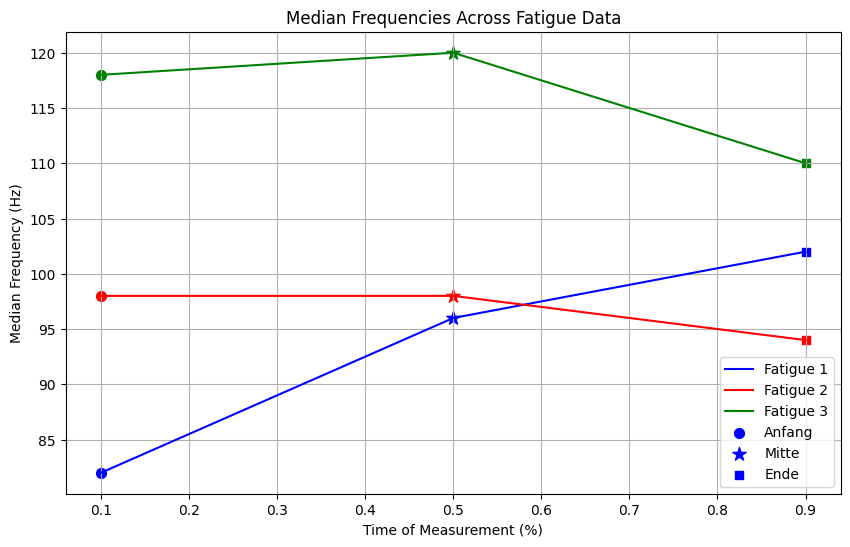

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

# Angenommene Variablen und Funktionen
# fs = Samplingfrequenz, fatigue1, fatigue2, fatigue3 = DataFrames mit 'emg'-Spalte
# l3f.get_power() = Funktion zur Berechnung der spektralen Leistungsdichte
# lowpass_filter() = Funktion zum Filtern der Daten

# Filtereinstellungen
fs = 1000  # Samplingfrequenz in Hz
segment_duration = 0.5  # Segmentdauer in Sekunden
samples_per_segment = int(segment_duration * fs)

# Indizes für Burst-Segmente aus fatigue['emg']
burst_start_idx = int(4 * fs)  # Startindex
burst_end_idx = burst_start_idx + int(1.5 * fs)  # Endindex

# Funktion zur Analyse der Segmente

def analyze_fatigue(fatigue, title_prefix):
    # Segmente für Anfang, Mitte und Ende des Bursts
    start_idx = burst_start_idx
    start_segment = fatigue['emg'][start_idx:start_idx + samples_per_segment]

    middle_idx = burst_start_idx + (burst_end_idx - burst_start_idx) // 2 - samples_per_segment // 2
    middle_segment = fatigue['emg'][middle_idx:middle_idx + samples_per_segment]

    end_idx = burst_end_idx - samples_per_segment
    end_segment = fatigue['emg'][end_idx:end_idx + samples_per_segment]

    # Berechnung der spektralen Leistungsdichte für jedes Segment
    start_power, start_freqs = l3f.get_power(start_segment, fs)
    middle_power, middle_freqs = l3f.get_power(middle_segment, fs)
    end_power, end_freqs = l3f.get_power(end_segment, fs)

    # Gefilterte Daten
    cutoff_freq = 40  # Cutoff-Frequenz
    filtered_start_power = lowpass_filter(start_power, cutoff=cutoff_freq, fs=fs)
    filtered_middle_power = lowpass_filter(middle_power, cutoff=cutoff_freq, fs=fs)
    filtered_end_power = lowpass_filter(end_power, cutoff=cutoff_freq, fs=fs)

    # Berechnung der Medianfrequenzen für Start, Mitte und Ende
    start_area = cumulative_trapezoid(filtered_start_power, start_freqs, initial=0)
    start_total_power = start_area[-1]
    start_median_freq = start_freqs[np.where(start_area >= start_total_power / 2)[0][0]]

    middle_area = cumulative_trapezoid(filtered_middle_power, middle_freqs, initial=0)
    middle_total_power = middle_area[-1]
    middle_median_freq = middle_freqs[np.where(middle_area >= middle_total_power / 2)[0][0]]

    end_area = cumulative_trapezoid(filtered_end_power, end_freqs, initial=0)
    end_total_power = end_area[-1]
    end_median_freq = end_freqs[np.where(end_area >= end_total_power / 2)[0][0]]

    # Medianfrequenzen für die Visualisierung
    median_frequencies = [start_median_freq, middle_median_freq, end_median_freq]
    time_points = [0.1, 0.5, 0.9]

    return median_frequencies, time_points

# Analyse für Fatigue 1
median_freqs_f1, time_points_f1 = analyze_fatigue(fatigue1, "Fatigue 1")

# Analyse für Fatigue 2
median_freqs_f2, time_points_f2 = analyze_fatigue(fatigue2, "Fatigue 2")

# Analyse für Fatigue 3
median_freqs_f3, time_points_f3 = analyze_fatigue(fatigue3, "Fatigue 3")

# Plot für alle Fatigue-Datensätze
plt.figure(figsize=(10, 6))
plt.plot(time_points_f1, median_freqs_f1, color='blue', label='Fatigue 1')
plt.plot(time_points_f2, median_freqs_f2, color='red', label='Fatigue 2')
plt.plot(time_points_f3, median_freqs_f3, color='green', label='Fatigue 3')

plt.scatter([time_points_f1[0]], [median_freqs_f1[0]], marker='o', color='blue', label='Anfang', s = 50)
plt.scatter([time_points_f1[1]], [median_freqs_f1[1]], marker='*', color='blue', s=100, label='Mitte')
plt.scatter([time_points_f1[2]], [median_freqs_f1[2]], marker='s', color='blue', label='Ende')

plt.scatter([time_points_f2[0]], [median_freqs_f2[0]], marker='o', color='red', s = 50)
plt.scatter([time_points_f2[1]], [median_freqs_f2[1]], marker='*', color='red', s=100)
plt.scatter([time_points_f2[2]], [median_freqs_f2[2]], marker='s', color='red')

plt.scatter([time_points_f3[0]], [median_freqs_f3[0]], marker='o', color='green', s = 50)
plt.scatter([time_points_f3[1]], [median_freqs_f3[1]], marker='*', color='green', s=100)
plt.scatter([time_points_f3[2]], [median_freqs_f3[2]], marker='s', color='green')

plt.title('Median Frequencies Across Fatigue Data')
plt.xlabel('Time of Measurement (%)')
plt.ylabel('Median Frequency (Hz)')
plt.grid()
plt.legend()
plt.show()


In [23]:
import pandas as pd

def import_fatigue_files(separator="\t"):
    """
    Importiert die drei Fatigue-Datensätze und gibt jeden als separaten DataFrame zurück.
    Input: separator - Trennzeichen für die Dateien (standardmäßig Tabulator)
    Output: Drei DataFrames, jeweils für Fatigue1, Fatigue2 und Fatigue3.
    """
    def time_norm(data):
        # Normalisiert die Zeitachse, um kontinuierliche Werte sicherzustellen
        times = list(data['t'])
        offset = 0
        for i in range(1, len(times)):
            if times[i] < times[i - 1]:
                offset += times[i - 1] - times[i] + 1
            times[i] += offset
        data['t'] = times
        return data

    # Leerer Platzhalter für die DataFrames
    fatigue_files = []

    # Lade die drei Fatigue-Datensätze
    for i in range(1, 4):
        file_name = f"Fatigue{i}.txt"
        temp_data = pd.read_csv(file_name, sep=separator, names=['emg', 't'], skiprows=0, engine='python')
        fatigue_files.append(time_norm(temp_data))

    return fatigue_files[0], fatigue_files[1], fatigue_files[2]
